# Transformer
We will implement the Transformer architecture presented in class.

In [ ]:
import torch
import torch.nn as nn

We start with the attention. Define a class `TransformerAttention` that will contain all the functions related to the Transformer's attention that we need. Add an `__init__` method that takes `hidden_dim` and `num_heads` as parameters.

In [ ]:
class TransformerAttention(nn.Module):
    
    def __init__(self, hidden_dim, num_heads):
        pass

Now we're adding its functions one after the other. We start with the best part: the attention function. Implement scaled-dot product attention when given `query`, `key`, and `value` tensors as inputs. The dimensions of these tensors are: `[batch_size, sequence_length, head_dim]`. Scaled dot-product attention is defined as:
$$\text{DPA}(Q, K, V) = \text{softmax}(\frac{Q K^\top}{\sqrt{d}}) V$$

In [ ]:
def dot_product_attention(self, query, key, value):
    pass

TransformerAttention.dot_product_attention = dot_product_attention

Implement a function `split_to_heads` that takes a tensor of dimensions `[?, ?, hidden_dim]` and splits it into `num_heads` tensors of size `[?, ?, head_dim]`, where $\text{head\_dim} = \frac{\text{hidden\_dim}}{\text{num\_heads}}$. The `?` dimensions are the same as before, but your implementation should be independent of them.

In [ ]:
def split_to_heads(self, tensor):
    pass

TransformerAttention.split_to_heads = split_to_heads

Now implement the `forward` method of `TransformerAttention` (and extend the `__init__` method if necessary). It should:
1. project its inputs into `query`, `key` and `value` tensors with 3 separate linear layers
2. split the tensors into chunks for each head to process
3. perform attention for each head separately
4. concatenate the results
5. run the output through another linear layer

This is exactly the multi-head attention module we saw in class:

<div>
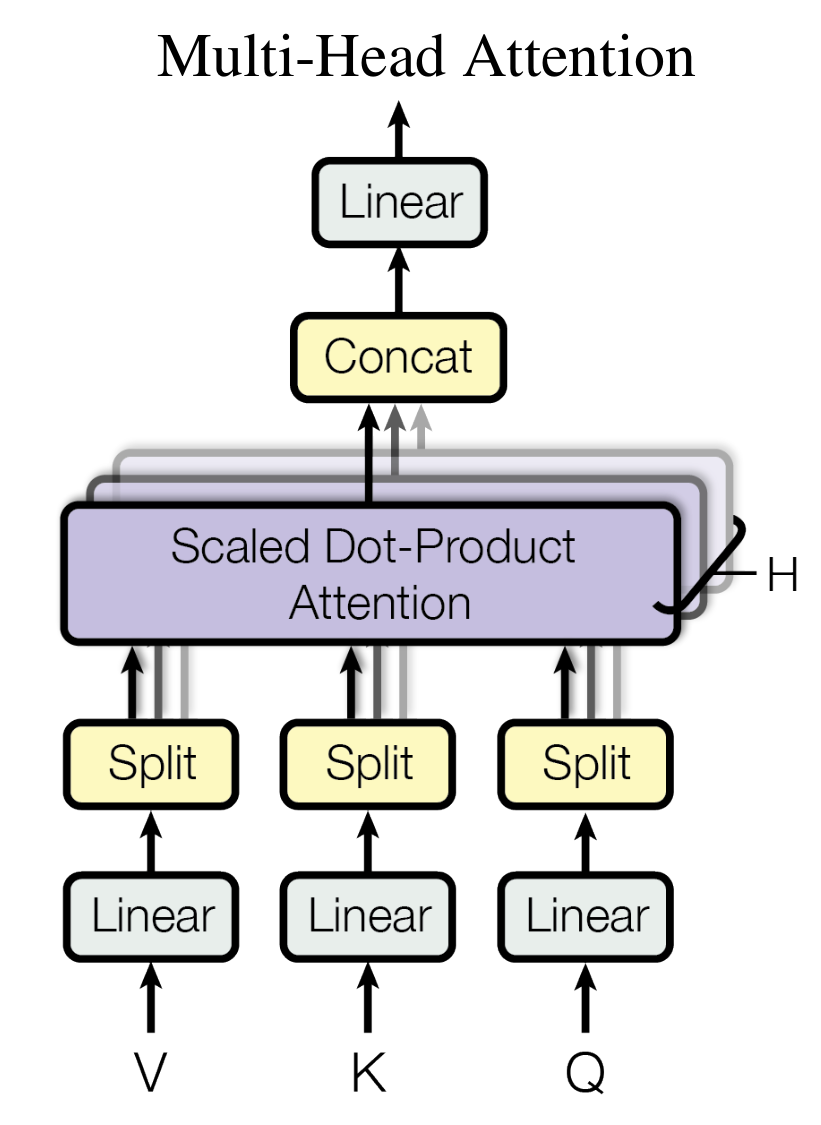
</div>

In [ ]:
def __init__(self, hidden_dim, num_heads):
    pass

def forward(self, x):
    pass

TransformerAttention.__init__ = __init__
TransformerAttention.forward = forward

Create a class `TransformerAttentionBlock` that runs Transformer attention, then adds the input as a residual to the output and performs layer normalization.

In [ ]:
class TransformerAttentionBlock(nn.Module):
    
    def __init__(self, hidden_dim, num_heads):
        pass
    
    def forward(self, x):
        pass

Create a class `FeedForwardNetwork` that consists of two linear layers with a ReLU in between. Also add a residual connection from the input to the output and apply layer normalization.

In [ ]:
class FeedForwardNetwork(nn.Module):
    
    def __init__(self, hidden_dim, inner_dim):
        pass
    
    def forward(self, x):
        pass

Now we can combine the `TransformerAttentionBlock` and the `FeedForwardNetwork` into a `TransformerLayer`. 

In [ ]:
class TransformerLayer(nn.Module):
    
    def __init__(self, hidden_dim, ffn_inner_dim, num_heads):
        pass
    
    def forward(self, x):
        pass

We are ready to compose our `TransformerEncoder` of a given number of `TransformerLayer`s.

In [ ]:
class TransformerEncoder(nn.Module):
    
    def __init__(self, hidden_dim, ffn_inner_dim, num_layers, num_heads):
        pass
    
    def forward(self, x):
        pass

Let's test our implementation with the hyperparameters...

In [ ]:
hidden_dim = 20
embedding_dim = hidden_dim
ffn_dim = 100
num_heads = 4
num_encoder_layers = 6
batch_size = 2
x_len = 10

... and check if it produces the correct output shapes.

In [ ]:
x = torch.randn(batch_size, x_len, embedding_dim)
encoder = TransformerEncoder(hidden_dim, ffn_dim, num_encoder_layers, num_heads)
output = encoder(x)
assert list(output.shape) == [batch_size, x_len, hidden_dim], "Wrong output shape"

## Transformer Decoder
For the Transformer decoder, two components are missing.
1. A causal mask in the `TransformerAttention`.
2. A cross-attention module in the `TransformerLayer`.

We start by generalizing the `TransformerAttention` class to use a causal mask in `dot_product_attention` if it is used for decoder self-attention. We check this by accessing an `is_decoder_self_attention` attribute of `self`, which we have to add as an argument to `TransformerAttention`'s `__init__` method first.

In [ ]:
# Add an `is_decoder_self_attention` attribute to TransformerAttention.__init__
def __init__(self, hidden_dim, num_heads, is_decoder_self_attention=False):
    super(TransformerAttention, self).__init__()  # we get an error here if we call super().__init__()
    pass

TransformerAttention.__init__ = __init__

In [ ]:
# Change the dot_product attention to use a causal mask in case it is used in the decoder self-attention.
def dot_product_attention(self, query, key, value):
        pass

TransformerAttention.dot_product_attention = dot_product_attention

Now we add cross-attention. We do this by updating the `TransformerAttention`'s `forward` method to take `encoder_hidden_states` as an optional input. Check the lecture slides to see which input gets projected into queries, keys and values.

In [ ]:
def forward(self, x, encoder_hidden_states=None):
    pass
    
TransformerAttention.forward = forward

We have to extend the `TransformerAttentionBlock` to allow that additional argument in its `forward` method.

In [ ]:
def forward(self, x, encoder_hidden_states=None):
    pass

TransformerAttentionBlock.forward = forward

Now we implement a `TransformerDecoderLayer` that consists of decoder self-attention, cross-attention and a feed-forward network. In the `forward` method, use the encoder hidden states as inputs to the cross-attention module.

In [ ]:
class TransformerDecoderLayer(nn.Module):
    
    def __init__(self, hidden_dim, ffn_inner_dim, num_heads):
        pass
    
    def forward(self, x, encoder_hidden_states):
        pass

Add a `TransformerDecoder` that holds the decoder layers.

In [ ]:
class TransformerDecoder(nn.Module):
    
    def __init__(self, hidden_dim, ffn_inner_dim, num_layers, num_heads):
        pass
    
    def forward(self, x, encoder_hidden_states):
        pass

## Transformer Seq2seq Model
We can now put everything together. Create and instantiate a Transformer model that encodes a random input `x`, then generates an output hidden representation for each decoder input `y` that we could then feed into a classifier to predict the words.

In [ ]:
class TransformerModel(nn.Module):
    
    def __init__(self, hidden_dim, ffn_dim, num_encoder_layers, num_decoder_layers, num_heads):
        pass
    
    def forward(self, x, y):
        pass

We will use the following hyperparameters.

In [ ]:
hidden_dim = 20
embedding_dim = hidden_dim
ffn_dim = 100
num_heads = 4
num_encoder_layers = 6
num_decoder_layers = 2
batch_size = 2
x_len = 10
y_len = 7

Now we can run our model and test that the output dimensions are correct.

In [ ]:
x = torch.randn(batch_size, x_len, embedding_dim)
y = torch.randn(batch_size, y_len, embedding_dim)
model = TransformerModel(hidden_dim, ffn_dim, num_encoder_layers, num_decoder_layers, num_heads)
output = model(x, y)
assert list(output.shape) == [batch_size, y_len, hidden_dim], "Wrong output shape"
num_model_params = sum(param.numel() for param in model.parameters())
assert num_model_params == 50480, f"Wrong number of parameters: {num_model_params}"

## What is missing for a real implementation?
Look at the [implementation of the Transformer for BERT by HuggingFace](https://github.com/huggingface/transformers/blob/main/src/transformers/models/bert/modeling_bert.py#L181), from line 181 until 642. 

**Question:** Name the things you see HuggingFace's implementation do that is still missing in your own implementation.

**Answer:** 
